In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from igp2 import AgentState
from igp2.data.data_loaders import InDDataLoader
from igp2.data.episode import Frame
from igp2.data.scenario import InDScenario, ScenarioConfig
from igp2.opendrive.map import Map
from igp2.opendrive.plot_map import plot_map
from grit.core.feature_extraction import FeatureExtractor, GoalDetector
from grit.core.goal_generator import GoalGenerator
from grit.core import feature_extraction
print(feature_extraction.__file__)

/home/cillian/phd/projects/GRIT/grit/core/feature_extraction.py


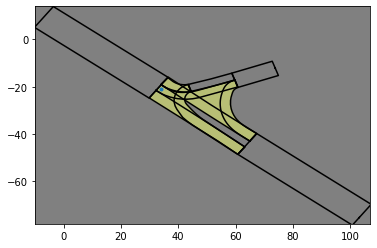

In [2]:
scenario = Map.parse_from_opendrive(f"../../scenarios/maps/heckstrasse.xodr")
point = (34, -21)
plot_map(scenario)
plt.plot(point[0], point[1], '.')

In [3]:
scenario.lanes_at(point, max_distance=0.1)

[Lane(id=-1) on Road(id=5)]

In [4]:
# TODO - check out dips in accuracy e.g. GRIT uniform prior 0.1 -> 0.2
results = pd.read_csv('../../predictions/heckstrasse_grit_uniform_prior_test.csv')

In [5]:
results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,0,0,0,2,turn-left,0.0,2,turn-left,0.999218,0.999218,0.000782,0.006375,0.009197,True
1,0,0,8,2,turn-left,0.1,2,turn-left,0.999218,0.999218,0.000782,0.006375,0.009197,True
2,0,0,16,2,turn-left,0.2,2,turn-left,0.999218,0.999218,0.000782,0.006375,0.009197,True
3,0,0,24,2,turn-left,0.3,2,turn-left,0.999218,0.999218,0.000782,0.006375,0.009197,True
4,0,0,32,2,turn-left,0.4,2,turn-left,0.999218,0.999218,0.000782,0.006375,0.009197,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0,409,25451,1,straight-on,0.6,1,straight-on,0.996681,0.996681,0.003319,0.022259,0.032113,True
4000,0,409,25457,1,straight-on,0.7,1,straight-on,0.996681,0.996681,0.003319,0.022259,0.032113,True
4001,0,409,25463,1,straight-on,0.8,1,straight-on,0.996681,0.996681,0.003319,0.022259,0.032113,True
4002,0,409,25469,1,straight-on,0.9,1,straight-on,0.986135,0.986135,0.013865,0.073090,0.105447,True


In [6]:
results_01 = results.loc[results.fraction_observed==0.1, 
                         ['episode', 'agent_id', 'frame_id', 'model_correct']]

In [7]:
results_02 = results.loc[results.fraction_observed==0.2, 
                         ['episode', 'agent_id', 'model_correct']]

In [8]:
results_merged = results_01.merge(results_02, on=['episode', 'agent_id'])

In [9]:
results_merged.loc[results_merged.model_correct_x!=results_merged.model_correct_y]

,episode,agent_id,frame_id,model_correct_x,model_correct_y
11,0,20,1875,True,False
27,0,39,3058,False,True
76,0,92,6263,False,True
110,0,127,8999,False,True
124,0,142,10236,False,True
127,0,147,10454,False,True
186,0,208,14321,False,True
234,0,262,17463,False,True
243,0,272,17644,False,True
249,0,280,18042,False,True


In [22]:
# TODO - check out dips in accuracy e.g. Generalised grit 0.2 -> 0.4
results = pd.read_csv('../../predictions/round_generalised_grit_test.csv')

In [23]:
results

,episode,agent_id,frame_id,true_goal,true_goal_type,fraction_observed,model_prediction,predicted_goal_type,model_probs,max_probs,min_probs,model_entropy,model_entropy_norm,model_correct
0,4,12,0,2,exit-roundabout,0.0,1,exit-roundabout,0.597656,0.597656,0.007989,0.894548,0.645280,False
1,4,12,36,2,exit-roundabout,0.1,1,exit-roundabout,0.469390,0.469390,0.006274,1.088661,0.785303,False
2,4,12,72,2,exit-roundabout,0.2,2,exit-roundabout,0.391970,0.391970,0.046248,1.222606,0.881924,True
3,4,12,108,2,exit-roundabout,0.3,0,exit-roundabout,0.371565,0.371565,0.033114,1.183576,0.853770,False
4,4,12,144,2,exit-roundabout,0.4,1,exit-roundabout,0.561658,0.561658,0.050056,0.990445,0.714455,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,21,459,23503,2,exit-roundabout,0.6,1,exit-roundabout,0.443647,0.443647,0.039538,1.040190,0.750339,False
7256,21,459,23526,2,exit-roundabout,0.7,2,exit-roundabout,0.766854,0.766854,0.060548,0.788417,0.568723,True
7257,21,459,23549,2,exit-roundabout,0.8,2,exit-roundabout,0.463411,0.463411,0.036589,0.954932,0.688838,True
7258,21,459,23572,2,exit-roundabout,0.9,2,exit-roundabout,0.366405,0.366405,0.028930,1.180007,0.851195,True


In [24]:
results_02 = results.loc[results.fraction_observed==0.2, 
                         ['episode', 'agent_id', 'frame_id', 'model_correct']]

In [28]:
results_04 = results.loc[results.fraction_observed==0.4, 
                         ['episode', 'agent_id', 'frame_id', 'model_correct']]

In [29]:
results_merged = results_02.merge(results_04, on=['episode', 'agent_id'])

In [30]:
results_merged.loc[results_merged.model_correct_x!=results_merged.model_correct_y]

,episode,agent_id,frame_id_x,model_correct_x,frame_id_y,model_correct_y
0,4,12,72,True,144,False
3,4,17,65,True,105,False
4,4,20,125,True,163,False
7,4,24,371,True,407,False
14,4,34,1006,True,1046,False
...,...,...,...,...,...,...
648,21,441,22883,True,22933,False
649,21,442,22921,True,22967,False
651,21,444,22958,True,23008,False
652,21,445,22971,True,23019,False
